In [2]:
#| default_exp HySpecNet11k_inference

# HySpecNet-11k: A Large-Scale Hyperspectral Dataset for Benchmarking Learning-Based Hyperspectral Image Compression Methods

- The **HySpecNet-11k dataset** is developed by:
  - The **Remote Sensing Image Analysis (RSiM)** group at TU Berlin.
  - The **Big Data Analytics in Earth Observation** group at the Berlin Institute for the Foundations of Learning and Data (BIFOLD).

- **Dataset Overview**:
  - HySpecNet-11k is a **large-scale hyperspectral benchmark dataset** containing 11,483 non-overlapping image patches.
  - Each patch consists of:
    - Dimensions: **128 × 128 pixels**.
    - Spectral Bands: **224 bands**.
    - Ground Sample Distance (GSD): **30 m**.

- **References**:
  - i. Github Repository: https://git.tu-berlin.de/rsim/hsi-compression.git
  - ii. Research Paper: https://arxiv.org/abs/2306.00385
  - iii. Dataset Link: https://datadryad.org/stash/dataset/doi:10.5061/dryad.fttdz08zh


- **Models**:

 [1] **1D-Convolutional Autoencoder (1D-CAE)**
- **Model Link**: [Link to Model](https://doi.org/10.5194/isprs-archives-XLIII-B1-2021-15-2021)


 [2] **Advanced 1D-Convolutional Autoencoder (1D-CAE-Adv)**
- **Model Link**: [Link to Model](https://doi.org/10.1109/WHISPERS56178.2022.9955109)


 [3] **Extended 1D-Convolutional Autoencoder (1D-CAE-Ext)**
- **Model Link**: [Link to Model](https://doi.org/10.1117/12.2636129)


 [4] **Spectral Signals Compressor Network (SSCNet)**
- **Model Link**: [Link to Model](https://doi.org/10.3390/rs14102472)


 [5] **3D Convolutional Autoencoder (3D-CAE)**
- **Model Link**: [Link to Model](https://doi.org/10.1117/1.JEI.30.4.041403)


In [3]:
#| hide
from nbdev.showdoc import *

### 1. Environment Setup

- Python 3.10+
- NVIDIA GPU + CUDA
- Ubuntu 22.04 LTS (Recommended)

### 2. Dependencies

All dependencies are listed in the requirements.txt and can be installed via the following command:

`pip install -r requirements.txt`

### 3. Data Preparation

### Dataset Preparation Guide

- **Dataset Download**:
   - Download the dataset from the link mentioned in the description or directly from [Dataset](https://datadryad.org/stash/dataset/doi:10.5061/dryad.fttdz08zh).

- **File Renaming for Simplified Operations**:
   - To streamline operations and simplify tracking, the filenames in the patches directory are renamed to shorter, more concise names. This helps make Python scripting and dataset management easier.

- **Preprocessed NumPy Files**:
   - The preprocessed hyperspectral data for each patch is stored in NumPy format (`*-DATA.npy`). To generate the preprocessed NumPy files, run the `tif_to_npy.ipynb` notebook from the [HySpecNet Tools](https://git.tu-berlin.de/rsim/hyspecnet-tools).

- **Band Reduction**:
   - The original 224 spectral bands are reduced to 202 bands.
   - Bands **[127–141]** and **[161–167]** are removed due to strong water vapor absorption effects.

- **Data Normalization**:
   - The data is **clipped and rescaled** to the range [0–1] using **min-max normalization**.

- **Data Type Conversion**:
   - The rescaled data is converted to **float32** for efficient storage and processing.

### HySpecNet-11k Dataset Overview

The HySpecNet-11k dataset is a comprehensive hyperspectral benchmark dataset containing 11,483 nonoverlapping image patches sourced from 250 EnMAP satellite tiles. These tiles were recorded over a period from November 2, 2022, to November 9, 2022. Each image patch has a dimension of 128 × 128 pixels and contains 224 spectral bands, with a ground sampling distance of 30 meters.

#### Directory and File Structure

The dataset's files are systematically organized within a hierarchical directory structure as detailed below:

- **Root Directory:** `hyspecnet-11k/`
  - **Patches Directory:** `patches/`
    - **Tile Directory (e.g., `tile_001`):**
      - **Patch Directory (e.g., `tile_001-patch_01`):**
        - `tile_001-patch_01-DATA.npy` - Preprocessed hyperspectral data in numpy format.
        - `tile_001-patch_01-SPECTRAL_IMAGE.TIF` - Hyperspectral image in geotiff format.
        - Quality layers and other related files in TIF format (e.g., `QL_PIXELMASK.TIF`, `QL_QUALITY_CIRRUS.TIF`).

#### Thumbnails

For each patch, there exists a thumbnail image (`*-THUMBNAIL.jpg`). The RGB channels for these thumbnails are derived from EnMAP bands 43, 28, and 10, corresponding to wavelengths 634.919 nm, 550.525 nm, and 463.584 nm, respectively.

#### Quality Layers

Quality information for each patch is stored in separate geotiff files, described as follows:

| Quality Layer              | 0       | 1        | 2       | 3         |
|----------------------------|---------|----------|---------|-----------|
| `QL_PIXELMASK.TIF`         | Normal  | Defective|         |           |
| `QL_QUALITY_CIRRUS.TIF`    | None    | Thin     | Medium  | Thick     |
| `QL_QUALITY_CLASSES.TIF`   | None    | Land     | Water   | Background|
| `QL_QUALITY_CLOUD.TIF`     | None    | Cloud    |         |           |
| `QL_QUALITY_CLOUDSHADOW.TIF` | None  | Cloud Shadow |     |           |
| `QL_QUALITY_HAZE.TIF`      | None    | Haze     |         |           |
| `QL_QUALITY_SNOW.TIF`      | None    | Snow     |         |           |
| `QL_SWIR.TIF`              | Normal  | Defective|         |           |
| `QL_VNIR.TIF`              | Normal  | Defective|         |           |

For more detailed information on quality test flags and additional quality layers, refer to the EnMAP HSI Level 1 / Level 2 Product Specification Document.

#### Naming Conventions

- **Tile Directories:** Follow the format `ENMAP01-<productType>-DT<datatakeID>_<timeStartDatatake>_<tileID>_<version>_<timeProcessing>Z-<file_name>/`.
- **Patch Directories:** Utilize the pattern `ENMAP01-<productType>-DT<datatakeID>_<timeStartDatatake>_<tileID>_<version>_<timeProcessing>Z-Y<yStart><yEnd>_X<xStart><xEnd>/`.
- **Files:** Each file within a patch folder maintains a precise naming protocol to aid in identification and organization.

#### Data Splits

The dataset includes predefined splits for different phases of machine learning model development:

- **Training Set:** 70% of the patches.
- **Validation Set:** 20% of the patches.
- **Test Set:** 10% of the patches.

Additionally, there are two types of splits in this datasets:
- **Easy Split:** Allows patches from the same tile to appear in different subsets.
- **Hard Split:** Restricts all patches from a single tile to the same subset, enhancing the testing rigor.

#### Further Details

For more information, refer to the official [HySpecNet-11k documentation](https://hyspecnet.rsim.berlin/). 


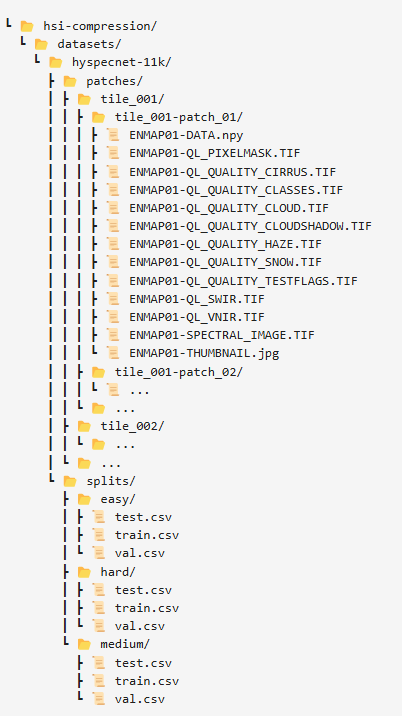




### SWIR & VNIR in Hyperspectral Data Preparation

In hyperspectral imaging, like that of the HySpecNet-11k dataset, SWIR (Short-Wave Infrared) and VNIR (Visible and Near-Infrared) bands are crucial for their unique characteristics, which are utilized in various stages of data preparation and analysis.

#### VNIR (Visible and Near-Infrared)

- **Wavelength Range:** Approximately 400 nm to 1000 nm, covering the visible spectrum and slightly beyond into the near-infrared.
- **Key Applications:**
  - **Vegetation Monitoring:** Utilizing chlorophyll absorption properties in this range for assessing plant health and land cover classification.
  - **Water Bodies Analysis:** Differentiating water bodies based on their absorption and scattering properties in the VNIR range.

- **Data Preparation Techniques:**
  - **Color Rendering:** Creating true-color or false-color images to assist in data interpretation.
  - **Normalization:** Ensuring data represents true surface reflectance, correcting for atmospheric disturbances.

#### SWIR (Short-Wave Infrared)

- **Wavelength Range:** Extends from about 1000 nm to 2500 nm, sensitive to moisture content and mineral compositions.
- **Key Applications:**
  - **Mineral Mapping:** Identifying minerals based on their specific absorption features in the SWIR range.
  - **Vegetation Stress Analysis:** Detecting changes in plant water status, important for drought studies.
  - **Fire Detection:** Penetrating smoke and detecting heat from fires more effectively.

- **Data Preparation Techniques:**
  - **Moisture Content Analysis:** Analyzing moisture content in soil and vegetation by exploiting water absorption features.
  - **Atmospheric Correction:** Correcting data for atmospheric absorption, particularly from water vapor, which is prominent in the SWIR range.

#### Integrating SWIR and VNIR in Data Preparation

In datasets like HySpecNet-11k, the integration of SWIR and VNIR data preparation techniques enhances the dataset's utility for diverse environmental and material studies. These techniques include:

- **Band Selection:** Excluding bands affected by atmospheric conditions like water vapor, especially prevalent in SWIR.
- **Calibration:** Ensuring consistent and accurate sensor responses across these spectral bands.
- **Normalization:** Radiometric normalization to adjust for sensor discrepancies and atmospheric conditions.

This structured approach ensures that the HySpecNet-11k dataset is a robust resource for remote sensing applications, facilitating comprehensive environmental analysis and material identification.


### Converting Hyperspectral TIF Images to NPY Format

This script automates the process of converting hyperspectral images stored in TIF format to NumPy's npy format, facilitating further analysis and processing. It uses Python's multiprocessing capabilities to handle multiple files simultaneously, enhancing efficiency.

#### Script Components

#### Setup
- **Logging**: Initializes logging to capture errors and other critical messages into a file named 'tif_to_npy_errors.log'.
- **Directory Validation**: Checks if the specified input directory exists, terminating the script with an error if the directory is not found.

#### Preprocessing Steps
- **Channel Filtering**: Excludes specific channels deemed invalid for analysis, which are identified and listed in `invalid_channels`. The script only processes valid channels.
- **Data Normalization**:
  - **Clipping**: Limits the data values to a specified range between a minimum and a maximum value to mitigate the effects of outliers or erroneous data points.
  - **Normalization**: Scales the clipped data to a 0-1 range, enhancing the uniformity of the data for subsequent analyses.
  
#### Conversion Function
- **Rasterio Usage**: Opens each TIF file using the `rasterio` library, which allows for reading and manipulating geospatial raster data.
- **Data Conversion**: Converts the valid channel data into floating-point format after clipping and normalization.
- **File Output**: Saves the processed data into npy format, ensuring each file is correctly written to the disk.

#### Multiprocessing
- **Efficiency**: Employs Python's `multiprocessing` to parallelize the conversion process, significantly speeding up the execution when dealing with large datasets.
- **Dynamic Pool Size**: Adjusts the number of parallel processes based on the available CPU cores, with a maximum cap to prevent overloading the system.

### Execution Flow
1. **Initialization**: Set up logging and directory paths.
2. **Data Handling**: Identify all TIF files within the directory structure.
3. **Parallel Processing**: Distribute file processing across multiple CPU cores to enhance throughput.
4. **Error Management**: Log any issues encountered during file handling and data processing to facilitate troubleshooting.

This script is particularly useful for researchers and engineers working with large volumes of hyperspectral data, automating a critical part of the data preparation workflow and enabling more efficient data handling and subsequent analysis etc.

link: https://git.tu-berlin.de/rsim/hyspecnet-tools/-/blob/main/tif_to_npy.ipynb


In [4]:
#| eval: false

import glob
import numpy as np
import rasterio
import os
import logging
from multiprocessing import Pool

# Setup logging
logging.basicConfig(
    filename='tif_to_npy_errors.log',
    level=logging.ERROR,
    format='%(asctime)s:%(levelname)s:%(message)s'
)

# Log to console as well for Jupyter Notebook
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)
console_handler.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(message)s'))
logging.getLogger().addHandler(console_handler)


#### `Note: make sure in_directory = path/to/your/datasets/patches`

In [5]:
#| eval: false

# Setup
in_directory = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/"  # Local directory

if not os.path.exists(in_directory):
    logging.error(f"Directory does not exist: {in_directory}")
else:
    logging.info(f"Directory found: {in_directory}")

# Filtering out invalid channels
invalid_channels = [
    126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 
    160, 161, 162, 163, 164, 165, 166
]
valid_channels_ids = [c for c in range(1, 225) if c-1 not in invalid_channels]  # zero-based to one-based indexing

minimum_value = 0
maximum_value = 10000



In [6]:
#| eval: false

# Conversion function
def convert(patch_path):
    if not os.path.exists(patch_path):
        logging.error(f"File not found: {patch_path}")
        return
    
    try:
        with rasterio.open(patch_path) as dataset:
            src = dataset.read(valid_channels_ids)
            clipped = np.clip(src, a_min=minimum_value, a_max=maximum_value)
            normalized = (clipped - minimum_value) / (maximum_value - minimum_value)
            out_data = normalized.astype(np.float32)
            
            # Save as .npy
            out_path = patch_path.replace("SPECTRAL_IMAGE", "DATA").replace("TIF", "npy")
            np.save(out_path, out_data)
            return out_path
            
            if not os.path.exists(out_path):
                raise FileNotFoundError(f"Failed to create {out_path}")
            
            logging.info(f"Converted and saved: {out_path}")
    except Exception as e:
        logging.error(f"Error processing {patch_path}: {str(e)}")


In [7]:
# Example test run for debugging
test_file = '/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-SPECTRAL_IMAGE.TIF'
convert(test_file)


'/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-DATA.npy'

In [8]:
#| eval: false
# Discover all spectral image files recursively
in_patches = glob.glob(os.path.join(in_directory, "**", "*SPECTRAL_IMAGE.TIF"), recursive=True)

In [9]:
# Print the first five entries in the list
for patch in in_patches[:5]:
    print(patch)

# Print the total number of patches
print("Total number of patches:", len(in_patches))

/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-SPECTRAL_IMAGE.TIF
/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_38/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y07830910_X05580685-SPECTRAL_IMAGE.TIF
/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_16/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y03990526_X04300557-SPECTRAL_IMAGE.TIF
/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_27/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y05270654_X09421069-SPECTRAL_IMAGE.TIF
/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_26/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010

In [10]:
#| eval: false
# Process patches sequentially for a single directory with an early break

def process_patches_with_break():
    print(f"Total number of patches to process: {len(in_patches)}")  # Debugging line
    if not in_patches:
        logging.warning("No patches found to process.")
        return

    logging.info(f"Starting conversion for directory: {in_directory}")
    for patch in in_patches:
        print(f"Attempting to process file: {patch}")  # More detailed debugging
        output_file = convert(patch)
        if output_file:
            logging.info(f"Processed one file: {patch}. Output file created: {output_file}")
            print(f"File converted and saved as: {output_file}")
        else:
            logging.info(f"Failed to convert file: {patch}")
            print(f"Failed to convert file: {patch}")
        break  # Stop after processing the first file
    logging.info("Stopped processing after one file.")


In [11]:
# Run the modified processing for the specified directory
process_patches_with_break()


Total number of patches to process: 1222
Attempting to process file: /root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-SPECTRAL_IMAGE.TIF
File converted and saved as: /root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-DATA.npy


#### `Note: make sure tif_file_path and npy_file_path is from your datasets patches tiles directory`

In [12]:
#| eval: false

import numpy as np
import rasterio

# Paths to your files
tif_file_path = "/root/HSI_HypSpecNet11k/hsi-compression//datasets/hyspecnet-11k/patches/tile_001/tile_001-patch_01/ENMAP01-____L2A-DT0000004990_20221104T023111Z_010_V010110_20221118T144901Z-Y00440171_X03070434-SPECTRAL_IMAGE.TIF"
npy_file_path = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_001/tile_001-patch_01/ENMAP01-____L2A-DT0000004990_20221104T023111Z_010_V010110_20221118T144901Z-Y00440171_X03070434-DATA.npy"

# Analyze .tif file
try:
    with rasterio.open(tif_file_path) as tif:
        # Dimensions and data types
        data_type_tif = tif.dtypes[0]  # Assuming all bands have the same data type
        dimensions_tif = (len(tif.indexes), tif.height, tif.width)
        bpppc_tif = np.dtype(data_type_tif).itemsize * 8  # Convert size in bytes to bits
        print("For .tif file:")
        print(f"Data Type: {data_type_tif}")
        print(f"Dimensions (Channels, Height, Width): {dimensions_tif}")
        print(f"bpppc: {bpppc_tif} bits per channel")
except Exception as e:
    print(f"Error reading .tif file: {e}")

# Analyze .npy file
try:
    npy_data = np.load(npy_file_path)
    data_type_npy = npy_data.dtype
    dimensions_npy = npy_data.shape
    bpppc_npy = npy_data.itemsize * 8  # Convert size in bytes to bits
    print("For .npy file:")
    print(f"Data Type: {data_type_npy}")
    print(f"Dimensions (Channels, Height, Width): {dimensions_npy}")
    print(f"bpppc: {bpppc_npy} bits per channel")
except Exception as e:
    print(f"Error reading .npy file: {e}")

For .tif file:
Data Type: int16
Dimensions (Channels, Height, Width): (224, 128, 128)
bpppc: 16 bits per channel
For .npy file:
Data Type: float32
Dimensions (Channels, Height, Width): (202, 128, 128)
bpppc: 32 bits per channel


### 4. Model Architecture

### 4. Model Architecture

#### Integrating Hyperspectral Image Compression Models from TU Berlin's GitLab

To utilize advanced machine learning models for hyperspectral image compression, you can integrate resources from the [TU Berlin's GitLab repository](https://git.tu-berlin.de/rsim/hsi-compression).

#### Step 1: Clone the Repository

Begin by cloning the repository to access model scripts and any available pretrained weights:

``!git clone https://git.tu-berlin.de/rsim/hsi-compression.git.``

#### Step 2: Explore the Repository

After cloning, explore the repository to locate crucial files:

- **Model Scripts:** Search for Python files that define the structure of neural networks. These scripts are integral for understanding how the models are built and can often be found in the main directory or a designated `models` subdirectory.

- **Training Scripts:** Look specifically for the `train.py` file, which includes the procedures for training the models. This script is essential for understanding the training process and any specific configurations used during model training.

#### Step 3: Download Pretrained Weights

Pretrained weights, if available, are a valuable asset as they can significantly enhance model performance without the need for extensive training. These weights allow you to leverage models that have been trained on large datasets that you might not have access to:

- **Check the README:** Often, the repository's README file or associated documentation will contain links to download pretrained weights. These links are usually pointed to external storage due to the large size of the files.

- **Storage Locations:** Common storage solutions for large files include cloud storage services like Google Drive, Dropbox, or dedicated academic and research file hosts.

By following these steps, you ensure that you have all necessary scripts and resources to effectively integrate and utilize the machine learning models for hyperspectral image compression in your projects.

#### Step 4: Integrate Models into Your Notebook

To use the models within your Jupyter notebook, load them using the appropriate commands based on the library used in the model's construction.


The proposed model utilizes a **Spectral Signals Compressor Network (SSCNet)** for hyperspectral image compression, which effectively balances data reduction with the preservation of critical spectral and spatial details.

#### Components:
- **Encoder**: The encoder section of SSCNet uses convolutional layers to extract and encode spatial and spectral features from hyperspectral images into a compact latent representation. This compression aims to capture the most informative aspects of the input data while significantly reducing its dimensionality.
- **Decoder**: The decoder reconstructs the hyperspectral image from its latent representation using transposed convolutional layers. It is designed to closely match the original input data, ensuring high fidelity in the reconstructed images. The quality of reconstruction is quantified using the Mean Squared Error (MSE), a metric that measures the pixel-wise differences between the original and reconstructed images.

#### Key Performance Indicators (KPIs):
- **Compression Efficiency**: Demonstrates a significant reduction in data size while maintaining high image quality, enabling more efficient storage and transmission.
- **Reconstruction Quality**: Ensures high fidelity of reconstructed images, with performance often validated by metrics such as PSNR (Peak Signal-to-Noise Ratio), which reflects the accuracy of pixel values in the reconstructed image compared to the original.
- **Spatial-Spectral Preservation**: Maintains effective retention of both spatial details and spectral signatures, crucial for applications where precise spectral information is paramount.
- **Scalability**: The network is designed to handle large-scale hyperspectral datasets, making it suitable for extensive remote sensing and environmental monitoring applications.

This model architecture offers an optimized solution for hyperspectral data compression, addressing both the challenges of managing large data volumes and the necessity of preserving detailed spectral information for advanced imaging applications.

#### SSCNet Model
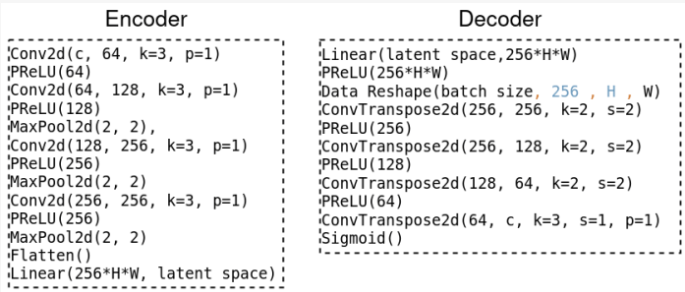

In [13]:
#|eval:false
#|export
import sys

#sys.path.append('path to the model') this is to run the model in your device
sys.path.append('/root/HSI_HypSpecNet11k/hsi-compression/models/')
from sscnet import SpectralSignalsCompressorNetwork
from torchsummary import summary
model = SpectralSignalsCompressorNetwork()
print(model)
summary(model, input_size=(202, 128, 128), batch_size=2, device='cpu') 


SpectralSignalsCompressorNetwork(
  (encoder): Sequential(
    (0): Conv2d(202, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): PReLU(num_parameters=256)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): PReLU(num_parameters=256)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): PReLU(num_parameters=256)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): PReLU(num_parameters=512)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): PReLU(num_parameters=1024)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1):

### 5. Data Visualization HySpecNet11k

#### `Note: BASE_DIR = path/to/your/datasets/patches`

In [14]:
#| eval:false
#| export
import os
import random
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import Image, display

# Configure matplotlib for headless environments
import matplotlib
matplotlib.use('Agg')

# Define the base directory (update if needed)
BASE_DIR = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches"


#### is_mostly_blank
- This function determines whether the majority of pixels in a given image are blank (or zero). 
- It is used to filter out images that do not contain enough useful data for further processing.

In [15]:
#|export
# Helper function to check if the image is mostly blank
def is_mostly_blank(image):
    """
    Checks if the image has less than 5% non-zero pixels.
    Args:
        image (np.ndarray): The image array.
    Returns:
        bool: True if the image is mostly blank, otherwise False.
    """
    non_zero_count = np.count_nonzero(image)
    total_count = image.size
    return (non_zero_count / total_count) < 0.05

# Test the function with a blank image
test_image_blank = np.zeros((100, 100), dtype=int)
print("Is blank image mostly blank:", is_mostly_blank(test_image_blank))

# Test the function with a non-blank image
test_image_non_blank = np.zeros((100, 100), dtype=int)
test_image_non_blank[0:50, :] = 1  # Make half the image non-zero
print("Is non-blank image mostly blank:", is_mostly_blank(test_image_non_blank))


Is blank image mostly blank: True
Is non-blank image mostly blank: False


#### collect_tif_files
- This function scans a specified directory recursively and collects paths to all .tif or .tiff files that do not include specific substrings typically associated with unwanted file types (like 'QL', 'MASK', 'HAZE').

In [16]:
#|export
# Function to collect valid .tif files
def collect_tif_files(base_dir=BASE_DIR):
    """
    Collects all valid .tif files from the specified base directory.
    Args:
        base_dir (str): The base directory to search for .tif files.
    Returns:
        list: List of valid .tif file paths.
    """
    tif_files = []
    print("Collecting .tif files...")
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.lower().endswith(".tif") or file.lower().endswith(".tiff"):
                if "QL" in file.upper() or "MASK" in file.upper() or "HAZE" in file.upper():
                    continue
                tif_files.append(os.path.join(root, file))
    return tif_files

# Test the function
tif_files = collect_tif_files()
print("Found files:", len(tif_files))


Found files: 1222


#### enhance_image
- This function enhances the contrast of an image using the method of contrast stretching.
- It improves the visual appearance of images by expanding their dynamic range.

In [17]:
#|export
# Helper function to enhance the image using contrast stretching
def enhance_image(image):
    """
    Enhances the image using contrast stretching.

    Args:
        image (np.ndarray): The image array.

    Returns:
        np.ndarray: The enhanced image array.
    """
    if np.all(image == 0) or np.nanstd(image) == 0:  # Check for constant/blank image
        print("Image is blank or constant, skipping enhancement.")
        return np.zeros_like(image)  # Return blank image
    p2, p98 = np.nanpercentile(image, (2, 98))
    img_stretched = np.clip((image - p2) / (p98 - p2), 0, 1)
    img_stretched = np.nan_to_num(img_stretched, nan=0)
    return img_stretched

#### process_and_display_images
- This function processes a set of .tif images by reading them, optionally enhancing them, and then displaying a subset.
- It is designed to visualize the content of randomly selected .tif files to ensure that they are suitable for further analysis.

In [21]:
#|export
#! eval: False

# Function to process and display random .tif files

def process_and_display_images(tif_files, num_samples=5):
    """
    Processes and displays random samples of .tif files.
    Args:
        tif_files (list): List of .tif file paths.
        num_samples (int): Number of random samples to process.
    """
    if len(tif_files) < num_samples:
        print("Not enough .tif files found. Displaying all available files.")
        selected_files = tif_files
    else:
        selected_files = random.sample(tif_files, num_samples)

    for file_path in selected_files:
        print(f"Processing file: {file_path}")
        try:
            with rasterio.open(file_path) as src:
                img = src.read()
                no_data_value = src.nodata
                if no_data_value is not None:
                    img = np.where(img == no_data_value, np.nan, img)

                num_bands = img.shape[0]
                print(f"Number of bands in image: {num_bands}")
                if num_bands < 5:
                    selected_bands = list(range(num_bands))
                else:
                    selected_bands = random.sample(range(num_bands), 5)

                fig, axes = plt.subplots(2, 3, figsize=(10, 5))
                for i, band in enumerate(selected_bands):
                    # Check if the band is mostly blank
                    if is_mostly_blank(img[band]):
                        print(f"Skipping blank band: {band + 1}")
                        continue

                    # Enhance the image and display
                    img_enhanced = enhance_image(img[band])
                    ax = axes.flatten()[i]
                    ax.imshow(img_enhanced, cmap='gray')
                    ax.set_title(f"Band {band + 1}")
                    ax.axis('off')
                    
                plt.tight_layout()
                output_path = f"{os.path.splitext(file_path)[0]}_preview.png"
                plt.savefig(output_path)
                plt.close(fig)
                print(f"Preview saved as: {output_path}")
                display(Image(output_path))
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")


Processing file: /root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-SPECTRAL_IMAGE.TIF
Number of bands in image: 224
Preview saved as: /root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_007/tile_007-patch_13/ENMAP01-____L2A-DT0000004981_20221102T031526Z_007_V010110_20221118T204141Z-Y02710398_X09421069-SPECTRAL_IMAGE_preview.png


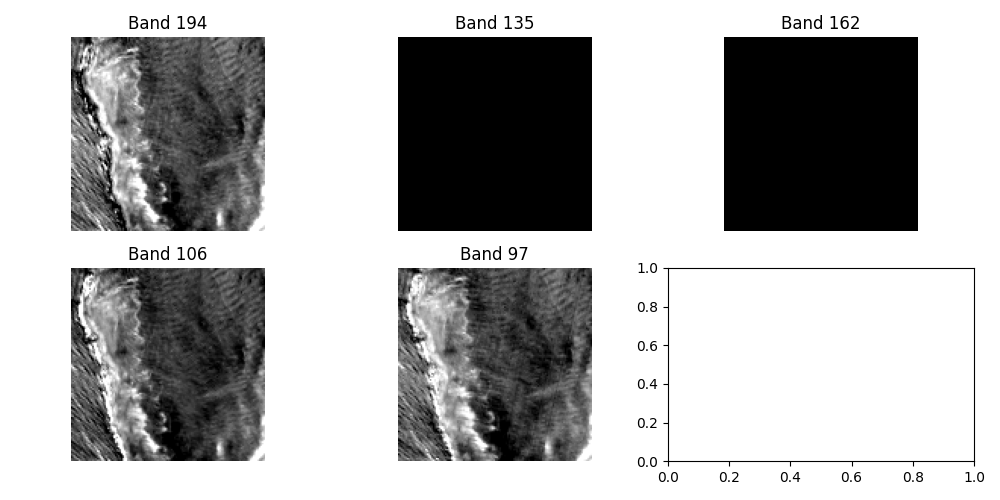

In [23]:
# Test the function with some of the collected tif files
process_and_display_images(tif_files[:5], num_samples=1)

### 6. Test Run

The ``test.py`` expects the following command line arguments:

**Command-Line Arguments for `test.py`**:

| **Parameter**    | **Description**                                | **Default**                  | **For SSCNet**              |
|------------------|------------------------------------------------|------------------------------|-----------------------------|
| `--device`       | Device to use (default: 0), e.g., `cpu` or `0` | `0`                          | `0`                         |
| `--batch-size`   | Test batch size                                | `64`                         | `64`                        |
| `-n`             | Data loader threads                            | `0`                          | `0`                         |
| `-d`             | Path to dataset                                | `./datasets/hyspecnet-11k/`  | `./datasets/hyspecnet-11k/` |
| `--mode`         | Dataset split difficulty                       | `easy`                       | `easy`                      |
| `-m`             | Model architecture                             | `cae1d`                      | `sscnet`                    |
| `--checkpoint`   | Path to the checkpoint to evaluate             | `None`                       | `None`                      |
| `--half`         | Convert model to half floating point (fp16)    | `False`                      | `False`                     |
| `--save-dir`     | Directory to save results                      | `./results/tests/`           | `./results/tests/`          |
| `--seed`         | Set random seed for reproducibility            | `10587`                      | `10587`                     |


**Note:** Customize the batch-size as per your system specification

**Pre-Trained Weights**

Pre-trained weights are publicly available and should be downloaded into the `./results/weights/` folder.

| **Method**    | **Model**  | **Rate**   | **PSNR**   | **Download Link**                                                                                      |
|---------------|------------|------------|------------|--------------------------------------------------------------------------------------------------------|
| SSCNet [6]    | `sscnet`    | 2.53 bpppc | 43.64 dB   | [sscnet_2point5bpppc.pth.tar](https://tubcloud.tu-berlin.de/s/igLNmTG9kExngz9/download/sscnet_2point5bpppc.pth.tar)   |

**Reference**:
- [6] [Spectral Signals Compressor Network (SSCNet)](https://www.mdpi.com/2072-4292/14/10/2472)




**Steps to run the test.sh**

Specify the parameters in the `test.sh` file and then execute the following command

- Display the content of `test.sh` using:
  `cat test.sh`

- Make the `test.sh` file executable:
  `chmod +x test.sh`

- Run the script:
  `./test.sh`

Or run the python code directly through the console:

```bash
python test.py \
    --device 0 \
    --batch-size 64 \
    --num-workers 4 \
    --mode easy \
    --model sscnet \
    --checkpoint ./results/weights/sscnet_2point5bpppc.pth.tar



#### To run the test on notebook, ensure to change the directory
``os.chdir("path to / hsi-compression")``

In [ ]:
#| hide
#| eval:False

import pandas as pd
import numpy as np
import os
import csv

BASE_DIR = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches"

def check_files_from_csv(csv_file):
    with open(csv_file, newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            full_path = os.path.join(BASE_DIR, row[0])
            if os.path.exists(full_path):
                try:
                    # First, read the first 100 bytes
                    with open(full_path, 'rb') as f:
                        bytes = f.read(100)
                        print(f"First 100 bytes of {full_path}: {bytes}")
                    
                    # Then, try to load the .npy file
                    data = np.load(full_path)
                    print(f"Loaded {full_path} successfully.")
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")
            else:
                print(f"File not found: {full_path}")

# Replace 'your_csv_path.csv' with the path to your CSV file
check_files_from_csv('/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/splits/easy/test.csv')



In [ ]:
#| hide
#| eval: False

import csv
import os

BASE_DIR = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches"

def verify_paths_from_csv(csv_file):
    with open(csv_file, newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            full_path = os.path.join(BASE_DIR, row[0])
            if not os.path.exists(full_path):
                print(f"File not found: {full_path}")
            else:
                print(f"Verified: {full_path}")

# Run the verification
verify_paths_from_csv('/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/splits/easy/test.csv')


In [65]:
#| hide
#| eval:False

import numpy as np
import os

BASE_DIR = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches"

def verify_npy_files(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.npy'):
                npy_path = os.path.join(root, file)
                try:
                    data = np.load(npy_path, allow_pickle=True)  # Load the file
                    if data.size == 0:
                        print(f"Empty file: {npy_path}")
                except Exception as e:
                    print(f"Corrupted file: {npy_path}, Error: {e}")

verify_npy_files(BASE_DIR)


Corrupted file: /root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_014/tile_014-patch_04/ENMAP01-____L2A-DT0000004990_20221104T023036Z_002_V010110_20221116T121134Z-Y01500277_X06690796-DATA.npy, Error: No data left in file


In [ ]:
#| eval: False

os.chdir("/root/HSI_HypSpecNet11k/hsi-compression")
!cat test.sh
!chmod +x test.sh
!bash test.sh

# when using window powershell
#!type test.sh
#!powershell -Command "& {Set-ExecutionPolicy -Scope Process -Force; ./test.sh}"

### 7. Result

In [25]:
#| eval:false
#| export
import json
import os

def analyze_results(json_file="/root/HSI_HypSpecNet11k/hsi-compression/results/tests/weights.json"):
    """
    Analyzes the compression results from a given JSON file and prints key metrics.

    Args:
        json_file (str): Path to the JSON file containing the compression results.
    """
    if not os.path.exists(json_file):
        print(f"File not found: {json_file}")
        return

    with open(json_file, 'r') as f:
        data = json.load(f)

    # Extract values
    name = data.get("name", "N/A")
    description = data.get("description", "No description")
    bpppc = data["results"].get("bpppc", [None])[0]
    psnr = data["results"].get("psnr", [None])[0]
    ssim = data["results"].get("ssim", [None])[0]
    sa = data["results"].get("sa", [None])[0]
    encoding_time = data["results"].get("encoding_time", [None])[0]
    decoding_time = data["results"].get("decoding_time", [None])[0]

    # Print extracted values
    print(f"Name: {name}")
    print(f"Description: {description}")
    print(f"Bits Per Pixel Per Channel (bpppc): {bpppc:.2f}")
    print(f"PSNR: {psnr:.2f} dB")
    print(f"SSIM: {ssim:.4f}")
    if sa is not None:
        print(f"Spectral Angle (SA): {sa:.2f}")
    else:
        print("Spectral Angle (SA): Not available")

    print(f"Encoding Time: {encoding_time:.4f} seconds")
    print(f"Decoding Time: {decoding_time:.4f} seconds")

    # Inference Analysis
    if psnr > 40 and ssim > 0.95:
        print("Inference: The compression maintains high image quality.")
    else:
        print("Inference: The compression may have degraded image quality.")

    if encoding_time < 0.01:
        print("Inference: The encoding process is fast.")
    else:
        print("Inference: The encoding process is relatively slow.")

    if decoding_time < 0.01:
        print("Inference: The decoding process is fast.")
    else:
        print("Inference: The decoding process is relatively slow.")



In [26]:
#| eval:false
analyze_results()

Name: sscnet
Description: Test
Bits Per Pixel Per Channel (bpppc): 2.53
PSNR: 43.37 dB
SSIM: 0.9748
Spectral Angle (SA): 1.84
Encoding Time: 0.0029 seconds
Decoding Time: 0.0015 seconds
Inference: The compression maintains high image quality.
Inference: The encoding process is fast.
Inference: The decoding process is fast.


### DNN Compression Pruning

In [2]:
import csv
import os
import sys
import torch
import time
import numpy as np
import pandas as pd
from torch import nn
sys.path.append('/root/HSI_HypSpecNet11k/hsi-compression/')
sys.path.append('/root/HSI_HypSpecNet11k/hsi-compression/models/')
from sscnet import SpectralSignalsCompressorNetwork
from fastai.vision.all import DataLoader, DataLoaders
from torch.utils.data import Dataset, DataLoader as TorchDataLoader
from pathlib import Path


#### Loading the DATA.npy files from the main csv file 

In [5]:

#| eval: false
# Base directory for `.npy` files
base_directory = '/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/'

# Utility to load paths from a CSV file
def load_paths(csv_file):
    df = pd.read_csv(csv_file, header=None)
    file_paths = [os.path.join(base_directory, x.strip()) for x in df[0]]
    print("Paths loaded successfully.")
    return file_paths


#### creating the datalaoder for the pruning model

In [6]:

#| eval: false
# Dataset class for `.npy` files
class NPYDataset(Dataset):
    def __init__(self, root_dir, mode="easy", split="train", transform=None):
        self.root_dir = root_dir

        self.csv_path = os.path.join(self.root_dir, "splits", mode, f"{split}.csv")
        with open(self.csv_path, newline='') as f:
            csv_reader = csv.reader(f)
            csv_data = list(csv_reader)
            self.npy_paths = sum(csv_data, [])
        self.npy_paths = [os.path.join(self.root_dir, "patches", x) for x in self.npy_paths]

        self.transform = transform

    def __len__(self):
        return len(self.npy_paths)

    def __getitem__(self, index):
        # get full numpy path
        npy_path = self.npy_paths[index]
        # read numpy data
        img = np.load(npy_path)
        # convert numpy array to pytorch tensor
        img = torch.from_numpy(img)
        # apply transformations
        if self.transform:
            img = self.transform(img)
        return img, img

#| eval: false
# Function to standardize samples
def transform_sample(sample):
    return (sample - np.mean(sample)) / np.std(sample)

#| eval: false
# Function to create DataLoaders
def create_dataloaders(batch_size=4, transform=None):
    datadir = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/"
    dl_list = []
    for split in ["train", "val", "test"]:
        dataset = NPYDataset(datadir, mode="easy", split=split, transform=None)
        dl = DataLoader(
            dataset,
            batch_size=batch_size,
            num_workers=10,
            shuffle=False,
            pin_memory=False,
            drop_last=False
        )
        dl_list.append(dl)
    dls = DataLoaders(dl_list[0], dl_list[1])
    dls.test_dl = dl_list[2]
    return dls

### Evaluating the performance KPIs

#### Peak signal-to-noise ratio (PSNR)

In [7]:
import torch
from metrics.psnr import PeakSignalToNoiseRatio
from tqdm import tqdm

dls = create_dataloaders()

# Path to the original model's weights
original_model_path = "/root/HSI_HypSpecNet11k/hsi-compression/results/weights/sscnet_2point5bpppc.pth.tar"

@torch.no_grad()
def calculate_psnr(model, dataloader, device="cpu"):
    psnr_metric = PeakSignalToNoiseRatio()
    model.to(device).eval()

    total_psnr = 0.0
    num_samples = 0

    with torch.no_grad():
        for xb,_ in tqdm(dataloader, desc="Calculating PSNR", leave=True):
            xb = xb.to(device)
            preds = model(xb)
            psnr = psnr_metric(preds, xb)
            total_psnr += psnr.item()
    
        avg_psnr = total_psnr / len(dataloader)
    return avg_psnr

# Initialize the original model
original_model = SpectralSignalsCompressorNetwork()

# Load the original model weights
print(f"Loading original model weights from {original_model_path}...")
original_model.load_state_dict(torch.load(original_model_path)["state_dict"], strict=False)
print("Original model loaded successfully.")

# Calculate PSNR for the original model
psnr_original = calculate_psnr(original_model, dls.test_dl, device="cuda")

# Calculate PSNR for the quantized model (directly, no saving or loading)
compressed_model = torch.load("/root/HSI_HypSpecNet11k/hsicomp/nbs/prsp30ep5lr5.pth")
compressed_model.eval()
psnr_quantized = calculate_psnr(compressed_model, dls.test_dl, device="cuda")

# Print PSNR results
print(f"PSNR for Original Model: {psnr_original:.2f} dB")
print(f"PSNR for Quantized Model: {psnr_quantized:.2f} dB")


/tmp/ipykernel_390699/2577798465.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_model.load_state_dict(torch.load(original_model_path)["state_dict"], strict=Fa

Loading original model weights from /root/HSI_HypSpecNet11k/hsi-compression/results/weights/sscnet_2point5bpppc.pth.tar...
Original model loaded successfully.


Calculating PSNR: 100%|███████████████████████████████████████████████████████████████████████████████| 61/61 [00:03<00:00, 18.13it/s]
/tmp/ipykernel_390699/2577798465.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any

PSNR for Original Model: 43.37 dB
PSNR for Quantized Model: 36.09 dB


#### No. of parameters

In [8]:
# Calculate PSNR for the quantized model (directly, no saving or loading)
compressed_model = torch.load("/root/HSI_HypSpecNet11k/hsicomp/nbs/prsp30ep5lr5.pth")
compressed_model.eval()

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

count_parameters(original_model), count_parameters(compressed_model)

/tmp/ipykernel_390699/4263323912.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  compressed_model = torch.load("/root/HSI_HypSpecNet11k/hsicomp/nbs/prsp30ep5lr5.pth")


(13783242, 7911383)

#### mean squared error (MSE)

In [9]:
from metrics.mse import MeanSquaredError  # Import the custom MSE class
from tqdm import tqdm
import torch

@torch.no_grad()
def calculate_mse_loss(model, dataloader, device="cpu"):
    """Calculate the Mean Squared Error loss for a given model and dataloader."""
    mse_metric = MeanSquaredError()  # Use the imported custom MSE metric
    mse_metric.to(device)
    model.to(device)  # Ensure the model is on the correct device
    total_mse_loss = 0.0
    num_samples = 0

    for xb, _ in tqdm(dataloader, desc="Calculating MSE Loss", leave=True):
        xb = xb.to(device)  # Move input batch to the device
        preds = model(xb)  # Generate predictions
        total_mse_loss += mse_metric(preds, xb).item() * xb.size(0)
        num_samples += xb.size(0)

    avg_mse_loss = total_mse_loss / num_samples
    return avg_mse_loss

# Set the device based on CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the compressed model
compressed_model_path = "/root/HSI_HypSpecNet11k/hsicomp/nbs/prsp30ep5lr5.pth"
compressed_model = torch.load(compressed_model_path, map_location=device)

# Load the original model
original_model_path = "/root/HSI_HypSpecNet11k/hsi-compression/results/weights/sscnet_2point5bpppc.pth.tar"
original_checkpoint = torch.load(original_model_path, map_location=device)

# Extract the state_dict
original_model_state_dict = original_checkpoint["state_dict"]

# Initialize the original model architecture (replace `SpectralSignalsCompressorNetwork` with your actual model class)
from models.sscnet import SpectralSignalsCompressorNetwork  # Import your model architecture
original_model = SpectralSignalsCompressorNetwork()
original_model.load_state_dict(original_model_state_dict)  # Load the model weights

# Ensure both models are in evaluation mode
original_model.eval()
compressed_model.eval()

# Calculate MSE for both models
mse_original = calculate_mse_loss(original_model, dls.test_dl, device=device)
mse_quantized = calculate_mse_loss(compressed_model, dls.test_dl, device=device)

print(f"MSE Loss for Original Model: {mse_original:.6f}")
print(f"MSE Loss for Quantized Model: {mse_quantized:.6f}")


/tmp/ipykernel_390699/1953523775.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  compressed_model = torch.load(compressed_model_path, map_location=device)
/tmp/ipykerne

MSE Loss for Original Model: 0.000049
MSE Loss for Quantized Model: 0.000268


#### Spectral Angle (SA)

In [11]:
import torch
from metrics.sa import SpectralAngle  # Import the SpectralAngle class
from tqdm import tqdm

@torch.no_grad()
def calculate_spectral_angle(model, dataloader, device="cpu"):
    spectral_angle_metric = SpectralAngle()  # Initialize the SpectralAngle metric
    model.to(device).eval()  # Move model to device and set to evaluation mode

    total_sa = 0.0
    num_samples = 0

    with torch.no_grad():
        for xb, _ in tqdm(dataloader, desc="Calculating Spectral Angle", leave=True):
            xb = xb.to(device)  # Move batch to device
            preds = model(xb)  # Model predictions
            sa = spectral_angle_metric(preds, xb)  # Calculate spectral angle
            total_sa += sa.item()

        avg_sa = total_sa / len(dataloader)
    return avg_sa

# Path to the original model's weights
original_model_path = "/root/HSI_HypSpecNet11k/hsi-compression/results/weights/sscnet_2point5bpppc.pth.tar"

# Initialize the original model
original_model = SpectralSignalsCompressorNetwork()

# Load the original model weights
print(f"Loading original model weights from {original_model_path}...")
original_model.load_state_dict(torch.load(original_model_path)["state_dict"], strict=False)
print("Original model loaded successfully.")

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Calculate Spectral Angle for the original model
sa_original = calculate_spectral_angle(original_model, dls.test_dl, device=device)

# Calculate Spectral Angle for the quantized model (directly, no saving or loading)
compressed_model = torch.load("/root/HSI_HypSpecNet11k/hsicomp/nbs/prsp30ep5lr5.pth")
compressed_model.eval()
sa_quantized = calculate_spectral_angle(compressed_model, dls.test_dl, device=device)

# Print Spectral Angle results
print(f"Spectral Angle for Original Model: {sa_original:.4f} degrees")
print(f"Spectral Angle for Quantized Model: {sa_quantized:.4f} degrees")


/tmp/ipykernel_390699/2084252340.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_model.load_state_dict(torch.load(original_model_path)["state_dict"], strict=Fa

Loading original model weights from /root/HSI_HypSpecNet11k/hsi-compression/results/weights/sscnet_2point5bpppc.pth.tar...
Original model loaded successfully.


Calculating Spectral Angle: 100%|█████████████████████████████████████████████████████████████████████| 61/61 [00:03<00:00, 18.92it/s]
/tmp/ipykernel_390699/2084252340.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any

Spectral Angle for Original Model: 1.8409 degrees
Spectral Angle for Quantized Model: 3.4202 degrees


#### structural similarity index measure (SSIM) 

In [12]:
import torch
from metrics.ssim import StructuralSimilarity  # Import the StructuralSimilarity class
from tqdm import tqdm

@torch.no_grad()
def calculate_ssim(model, dataloader, device="cpu"):
    ssim_metric = StructuralSimilarity(data_range=1.0, channels=202)  # Initialize SSIM metric
    model.to(device).eval()  # Move model to device and set to evaluation mode

    total_ssim = 0.0
    num_samples = 0

    with torch.no_grad():
        for xb, _ in tqdm(dataloader, desc="Calculating SSIM", leave=True):
            xb = xb.to(device)  # Move batch to device
            preds = model(xb)  # Model predictions
            ssim = ssim_metric(preds, xb)  # Calculate SSIM
            total_ssim += ssim.item()

        avg_ssim = total_ssim / len(dataloader)
    return avg_ssim

# Calculate SSIM for the original model
ssim_original = calculate_ssim(original_model, dls.test_dl, device=device)

# Calculate SSIM for the quantized model (directly, no saving or loading)
ssim_quantized = calculate_ssim(compressed_model, dls.test_dl, device=device)

# Print SSIM results
print(f"SSIM for Original Model: {ssim_original:.4f}")
print(f"SSIM for Quantized Model: {ssim_quantized:.4f}")


Calculating SSIM: 100%|███████████████████████████████████████████████████████████████████████████████| 61/61 [00:04<00:00, 14.04it/s]

SSIM for Original Model: 0.9748
SSIM for Quantized Model: 0.9082


#### Inference Time

In [13]:
@torch.no_grad()
def calculate_inference_time(model, dataloader, device="cpu"):
    start_time = time.time()
    
    for xb, _ in tqdm(dataloader, desc="Calculating Inference Time", leave=True):
        xb = xb.to(device)
        model(xb)
    
    total_time = time.time() - start_time
    return total_time

time_original = calculate_inference_time(original_model, dls.test_dl, device=device)
time_quantized = calculate_inference_time(compressed_model, dls.test_dl, device=device)

print(f"Inference Time for Original Model: {time_original:.2f} seconds")
print(f"Inference Time for Quantized Model: {time_quantized:.2f} seconds")


Calculating Inference Time: 100%|█████████████████████████████████████████████████████████████████████| 61/61 [00:02<00:00, 26.24it/s]

Inference Time for Original Model: 2.32 seconds
Inference Time for Quantized Model: 2.34 seconds


#### VRAM usage 

In [103]:
def get_vram_usage():
    if torch.cuda.is_available():
        allocated = torch.cuda.memory_allocated() / (1024 ** 2)
        cached = torch.cuda.memory_reserved() / (1024 ** 2)
        return f"Allocated VRAM: {allocated:.2f} MB, Cached VRAM: {cached:.2f} MB"
    else:
        return "CUDA not available"

print("VRAM Usage After Loading Models:")
print(get_vram_usage())


VRAM Usage After Loading Models:
Allocated VRAM: 903.67 MB, Cached VRAM: 1754.00 MB


#### Model size comparison Original & Compressed

In [90]:
import os

def get_model_size(file_path):
    """Returns the model size in MB."""
    if os.path.exists(file_path):
        size_in_bytes = os.path.getsize(file_path)
        size_in_mb = size_in_bytes / (1024 ** 2)  # Convert bytes to MB
        return size_in_mb
    else:
        raise FileNotFoundError(f"File not found: {file_path}")

# Paths to model files
original_model_path = "/root/HSI_HypSpecNet11k/hsi-compression/results/weights/sscnet_2point5bpppc.pth.tar"
quantized_model_path = "/root/HSI_HypSpecNet11k/hsicomp/nbs/prsp30ep5lr5.pth"

# Get model sizes
original_model_size = get_model_size(original_model_path)
quantized_model_size = get_model_size(quantized_model_path)

# Calculate compression percentage
compression_percentage = ((original_model_size - quantized_model_size) / original_model_size) * 100

# Print results
print(f"Original Model Size: {original_model_size:.2f} MB")
print(f"Quantized Model Size: {quantized_model_size:.2f} MB")
print(f"Compression Percentage: {compression_percentage:.2f}%")


Original Model Size: 52.59 MB
Quantized Model Size: 30.20 MB
Compression Percentage: 42.58%


#### bits per pixel per channel (bpppc)

In [61]:
import rasterio
import numpy as np

# Paths to your files
tif_file_path = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_001/tile_001-patch_01/ENMAP01-____L2A-DT0000004990_20221104T023111Z_010_V010110_20221118T144901Z-Y00440171_X03070434-SPECTRAL_IMAGE.TIF"
npy_file_path = "/root/HSI_HypSpecNet11k/hsi-compression/datasets/hyspecnet-11k/patches/tile_001/tile_001-patch_01/ENMAP01-____L2A-DT0000004990_20221104T023111Z_010_V010110_20221118T144901Z-Y00440171_X03070434-DATA.npy"

# Analyze .tif file
try:
    with rasterio.open(tif_file_path) as tif:
        tif_dtypes = tif.dtypes  # Data type for each band
        print(f".tif file datatypes: {tif_dtypes}")

        # Bits per pixel per channel calculation
        tif_bpppc = np.dtype(tif_dtypes[0]).itemsize * 8  # Convert size in bytes to bits
        print(f".tif file bpppc (bits per pixel per channel): {tif_bpppc}")
except Exception as e:
    print(f"Error reading .tif file: {e}")

# Analyze .npy file
try:
    npy_data = np.load(npy_file_path)
    npy_dtype = npy_data.dtype
    print(f".npy file datatype: {npy_dtype}")

    # Bits per pixel per channel for .npy
    npy_bpppc = npy_data.dtype.itemsize * 8  # Convert size in bytes to bits
    print(f".npy file bpppc (bits per pixel per channel): {npy_bpppc}")
except Exception as e:
    print(f"Error reading .npy file: {e}")


.tif file datatypes: ('int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16

#### Ploting of KPIs

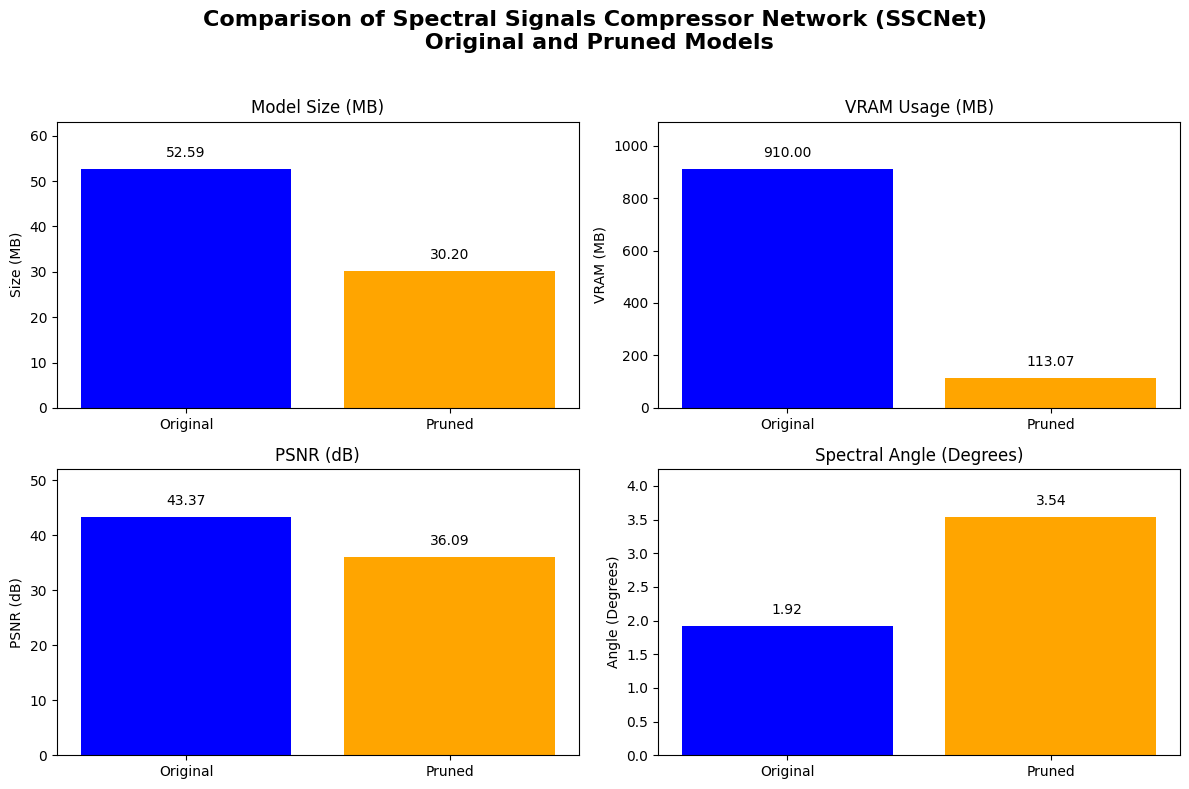

In [102]:
import matplotlib.pyplot as plt

# Define the add_values function to annotate bar plots
def add_values(ax, values):
    for i, value in enumerate(values):
        ax.text(i, value + (max(values) * 0.05), f'{value:.2f}', ha='center', fontsize=10, color='black')

# Updated data without MSE Loss and SSIM, replacing "Quantized" with "Pruned"
categories = ['Original', 'Pruned']
model_size = [52.59, 30.20]  # in MB
vram_usage = [910.00, 113.07]  # in MB
psnr = [43.37, 36.09]  # in dB
spectral_angle = [1.9181, 3.5443]  # in degrees
inference_time = [10.42, 10.45]  # in seconds

# Create subplots for the updated metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(
    'Comparison of Spectral Signals Compressor Network (SSCNet)\n Original and Pruned Models',
    fontsize=16,
    fontweight='bold'
)

# Model Size
axs[0, 0].bar(categories, model_size, color=['blue', 'orange'])
axs[0, 0].set_title('Model Size (MB)')
axs[0, 0].set_ylabel('Size (MB)')
axs[0, 0].set_ylim(0, max(model_size) * 1.2)
add_values(axs[0, 0], model_size)

# VRAM Usage
axs[0, 1].bar(categories, vram_usage, color=['blue', 'orange'])
axs[0, 1].set_title('VRAM Usage (MB)')
axs[0, 1].set_ylabel('VRAM (MB)')
axs[0, 1].set_ylim(0, max(vram_usage) * 1.2)
add_values(axs[0, 1], vram_usage)

# PSNR
axs[1, 0].bar(categories, psnr, color=['blue', 'orange'])
axs[1, 0].set_title('PSNR (dB)')
axs[1, 0].set_ylabel('PSNR (dB)')
axs[1, 0].set_ylim(0, max(psnr) * 1.2)
add_values(axs[1, 0], psnr)

# Spectral Angle
axs[1, 1].bar(categories, spectral_angle, color=['blue', 'orange'])
axs[1, 1].set_title('Spectral Angle (Degrees)')
axs[1, 1].set_ylabel('Angle (Degrees)')
axs[1, 1].set_ylim(0, max(spectral_angle) * 1.2)
add_values(axs[1, 1], spectral_angle)

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [11]:
#| export
def foo(): pass

In [16]:
#| hide
import os
os.chdir('/root/HSI_HypSpecNet11k/hsicomp/cicd_files')  # Adjust to your project's root path
print("Current working directory:", os.getcwd())

Current working directory: /root/HSI_HypSpecNet11k/hsicomp/cicd_files


In [17]:
#| hide
import nbdev; nbdev.nbdev_export()